In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

## Attrition Data

In [85]:
## Importing Attrition Data
df1 = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\Python\Project\Attrition - Attrition.csv")
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [86]:
## Applying label Encoder for the large sub-category columns
lb = LabelEncoder()
df1['EducationField'] = lb.fit_transform(df1['EducationField'])
df1['JobRole'] = lb.fit_transform(df1['JobRole'])
df1['BusinessTravel'] = lb.fit_transform(df1['BusinessTravel'])
df1['Over18'] = lb.fit_transform(df1['Over18'])

In [87]:
## Setting Ordinal Encoder for the Small sub-category columns
od_attrition = OrdinalEncoder(categories= [['Yes', 'No']])
od_department = OrdinalEncoder(categories= [['Research & Development', 'Sales', 'Human Resources']])
od_gender = OrdinalEncoder(categories= [['Male', 'Female']])
od_marital = OrdinalEncoder(categories=[['Married', 'Single', 'Divorced']])
od_overtime = OrdinalEncoder(categories=[['No', 'Yes']])

In [88]:
## Applying Ordinal Encoder
df1['Attrition'] = od_attrition.fit_transform(df1[['Attrition']])
df1['Department'] = od_department.fit_transform(df1[['Department']])
df1['Gender'] = od_gender.fit_transform(df1[['Gender']])
df1['MaritalStatus'] = od_marital.fit_transform(df1[['MaritalStatus']])
df1['OverTime'] = od_overtime.fit_transform(df1[['OverTime']])

In [89]:
## Checking for all the columns converted to Numerical data
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,2,1102,1.0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,1,279,0.0,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,2,1373,0.0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1,1392,0.0,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1.0,2,591,0.0,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [90]:
## Splitting Data into Two Parts
x = df1.drop(columns= ['Attrition'])
y = df1['Attrition']

In [91]:
## Applying Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 45)

In [92]:
# Applying StandardScaler for Standardization ---->
              ## Mean = 0 and Standard Deviation = 1
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)

In [93]:
## Converting into Dataframe
x_train_new = pd.DataFrame(x_train_sc, columns= x_train.columns)
np.round(x_train_new.describe(),2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.0,1176.00,1176.00,...,1176.00,1176.0,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.0,0.00,0.00,...,0.00,0.0,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,...,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.08,-2.44,-1.72,-0.67,-1.00,-1.88,-1.69,0.0,-1.71,-1.56,...,-1.57,0.0,-0.94,-1.46,-2.23,-2.50,-1.14,-1.18,-0.68,-1.16
25%,-0.77,-0.92,-0.84,-0.67,-0.88,-0.90,-0.95,0.0,-0.89,-0.65,...,-0.65,0.0,-0.94,-0.71,-0.64,-1.08,-0.67,-0.63,-0.68,-0.61
50%,-0.12,0.59,-0.01,-0.67,-0.25,0.07,-0.20,0.0,0.01,0.25,...,0.27,0.0,0.23,-0.20,0.16,0.34,-0.35,-0.36,-0.37,-0.34
75%,0.64,0.59,0.91,1.12,0.50,1.05,0.54,0.0,0.88,1.16,...,1.19,0.0,0.23,0.56,0.16,0.34,0.44,0.73,0.24,0.75
max,2.49,0.59,1.70,2.92,2.49,2.02,2.02,0.0,1.73,1.16,...,1.19,0.0,2.57,3.59,2.54,1.76,5.19,3.74,3.90,3.48


In [94]:
## Applying MinMaxScaler
mn = MinMaxScaler()
x_train_mn = mn.fit_transform(x_train)

x_train_norm = pd.DataFrame(x_train_mn, columns=x_train.columns)
np.round(x_train_norm.describe(), 2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.0,1176.00,1176.00,...,1176.00,1176.0,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00
mean,0.46,0.81,0.50,0.19,0.29,0.48,0.46,0.0,0.50,0.57,...,0.57,0.0,0.27,0.29,0.47,0.59,0.18,0.24,0.15,0.25
std,0.22,0.33,0.29,0.28,0.29,0.26,0.27,0.0,0.29,0.37,...,0.36,0.0,0.28,0.20,0.21,0.24,0.16,0.20,0.22,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.50,0.26,0.00,0.04,0.25,0.20,0.0,0.24,0.33,...,0.33,0.0,0.00,0.15,0.33,0.33,0.08,0.11,0.00,0.12
50%,0.43,1.00,0.50,0.00,0.21,0.50,0.40,0.0,0.50,0.67,...,0.67,0.0,0.33,0.25,0.50,0.67,0.12,0.17,0.07,0.18
75%,0.60,1.00,0.77,0.50,0.43,0.75,0.60,0.0,0.75,1.00,...,1.00,0.0,0.33,0.40,0.50,0.67,0.25,0.39,0.20,0.41
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,...,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Churn Modeling

In [ ]:
## Importing Churn Modeling Dataset
df2 = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\Python\Data\Churn_Modelling - Churn_Modelling.csv")
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Removing Surnames because of major subcategories
df2 = df2.drop(columns= ['Surname'])

In [ ]:
## Applying Column Transformer
transform = ColumnTransformer(transformers=[
    ('tnf1', OrdinalEncoder(categories= [['France', 'Germany', 'Spain']]), ['Geography']),
    ('tnf2', OrdinalEncoder(categories= [['Male', 'Female']]), ['Gender']),
    ], remainder= 'passthrough')

In [ ]:
## Dividing Data
x = df2.drop(columns= ['CreditScore'])
y = df2['CreditScore']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 56)

In [100]:
x_train_ct = transform.fit_transform(x_train)

x_train_new = pd.DataFrame(x_train_ct, columns= x_train.columns)
x_train_new.head()

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,1480.0,15640260.0,32.0,8.0,131081.66,2.0,1.0,1.0,69428.79,0.0
1,2.0,0.0,2790.0,15747503.0,44.0,0.0,184552.12,1.0,1.0,0.0,68860.30,1.0
2,0.0,0.0,5907.0,15745623.0,32.0,4.0,112079.58,1.0,0.0,0.0,89368.59,0.0
3,2.0,1.0,4290.0,15642579.0,37.0,1.0,128932.40,1.0,1.0,1.0,180712.52,0.0
4,0.0,1.0,3134.0,15646227.0,27.0,1.0,97893.20,1.0,1.0,0.0,166144.98,0.0


## Titanic Data

In [ ]:
## Importing Titanic dataset
df3 = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\Python\Data\titanic - titanic.csv")
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
## Filling Misiing Values using Pandas
df3['Age'] = df3['Age'].fillna(df3['Age'].mean())

<Axes: xlabel='Age'>

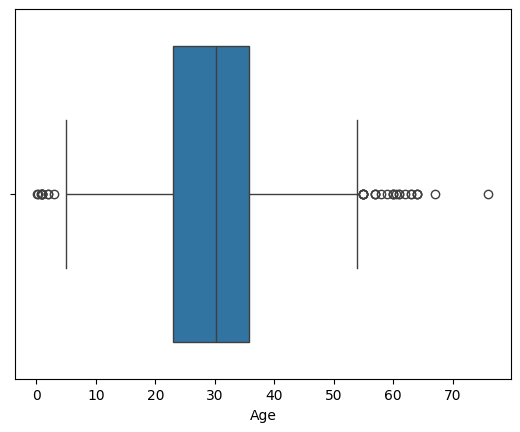

In [ ]:
## Using Boxplot to see the outliers
sns.boxplot(x = df3['Age'])

In [ ]:
## Getting 25% and 75% value from the data
percentile25 = df3['Age'].quantile(0.25)
percentile75 = df3['Age'].quantile(0.75)

In [ ]:
## Calculating IQR
IQR = percentile75 - percentile25

In [ ]:
## Setting Limit
upper_fence = percentile75 + 1.5 * (IQR)
lower_fence = percentile25 - 1.5 * (IQR)
print("Upper Limit: ", upper_fence)
print("Lower Limit: ", lower_fence)

Upper Limit:  54.875
Lower Limit:  3.875


In [107]:
df3[df3['Age'] > upper_fence]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
13,905,0,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,NaN,S
20,912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
77,969,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C


In [108]:
df3[df3['Age'] < lower_fence]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
89,981,0,2,"Wells, Master. Ralph Lester",male,2.00,1,1,29103,23.0000,NaN,S
117,1009,1,3,"Sandstrom, Miss. Beatrice Irene",female,1.00,1,1,PP 9549,16.7000,G6,S
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
250,1142,1,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S
263,1155,1,3,"Klasen, Miss. Gertrud Emilia",female,1.00,1,1,350405,12.1833,NaN,S
281,1173,0,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
284,1176,1,3,"Rosblom, Miss. Salli Helena",female,2.00,1,1,370129,20.2125,NaN,S
296,1188,1,2,"Laroche, Miss. Louise",female,1.00,1,2,SC/Paris 2123,41.5792,NaN,C
307,1199,0,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S
354,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S


In [ ]:
## Copying Data into another Variable
df3_new = df3.copy()
df3_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [110]:
# df3_new['Age'] = np.where(
#     df3_new['Age'] > upper_fence, upper_fence,

#     np.where(df3_new['Age'] < lower_fence, 
#              lower_fence, df3_new['Age'])
# )

In [111]:
df3_new['Age'] = df3_new['Age'].clip(lower_fence, upper_fence)

In [112]:
df3_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,54.87500,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


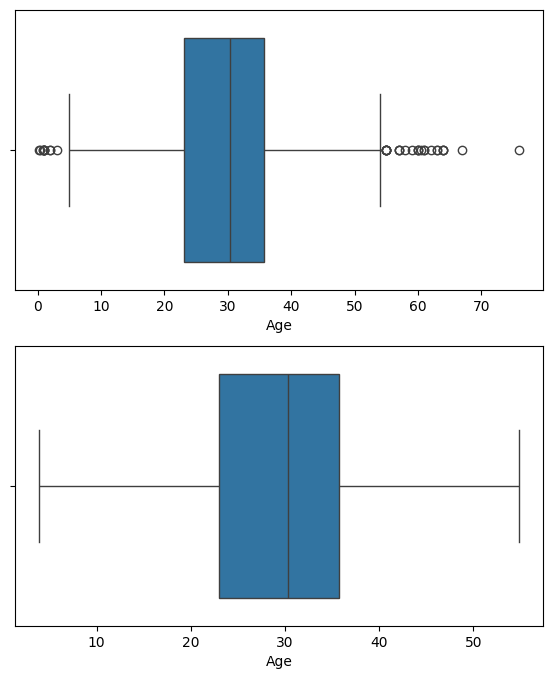

In [113]:
## Comparison
plt.figure(figsize= (15,8))

plt.subplot(222)
sns.boxplot(x = df3['Age'])

plt.subplot(224)
sns.boxplot(x = df3_new['Age'])

plt.show()